In [ ]:
import os
import glob

path = "./product_images"
files = glob.glob(path + '/*')


for i, f in enumerate(files) :
    os.rename(f, os.path.join(path, 'img_' + str(i) + '.jpg'))

In [ ]:
import numpy as np
from rembg import remove
import cv2

file_list = os.listdir('/Users/kyebeomjeon/workspace/Studio_Lab/product_images/')

if __name__ == "__main__" :
    input_path = '/Users/kyebeomjeon/workspace/Studio_Lab/product_images/'
    output_path = '/Users/kyebeomjeon/workspace/Studio_Lab/saved_png/'
    for i in range(102, len(file_list)) :
        input = cv2.imread(input_path + file_list[i])
        output = remove(input)
        cv2.imwrite(output_path + 'removed_bg_' + str(i) + '.png', output) # output[:, :, :-1]

In [ ]:
path = "./saved_png"
files = glob.glob(path + '/*')

for i, f in enumerate(files) :
    os.rename(f, os.path.join(path, 'removed_bg_' + str(i) + '.png'))

In [ ]:
path = "./saved_png"
files = glob.glob(path + '/*')
print(files[0])

(2, 43, 99) : 12.6% (93524)
(218, 166, 45) : 6.47% (48007)
(230, 199, 179) : 6.19% (45970)
(1, 1, 1) : 5.44% (40360)
(157, 124, 79) : 2.21% (16413)
Pixels in output: 244274 of 742500


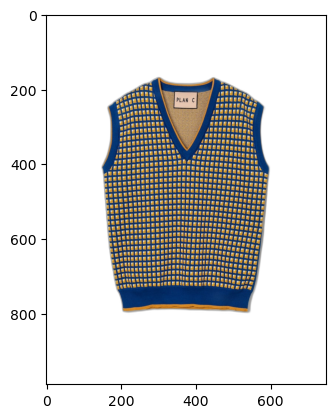

In [1]:
import extcolors
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/Users/kyebeomjeon/workspace/Studio_Lab/saved_png/removed_bg_318.png')
plt.imshow(img)
colors, pixel_count = extcolors.extract_from_image(img, limit = 5)

pixel_output = 0
ratio = []
for c in colors:
    pixel_output += c[1]
    print(f'{c[0]} : {round((c[1] / pixel_count) * 100, 2)}% ({c[1]})')
    ratio.append(c[1] / pixel_count * 100)
print(f'Pixels in output: {pixel_output} of {pixel_count}')

In [2]:
def rgb_to_hex(r, g, b) :
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

In [67]:
hex_labels = []
for i in range(len(colors)) :
    hex_labels.append(rgb_to_hex(str(colors[i][0][0]), str(colors[i][0][1]), str(colors[i][0][2])))
print(hex_labels)

['#022b63', '#daa62d', '#e6c7b3', '#010101', '#9d7c4f', '#4d4c51', '#a6b5d2', '#4f2e00', '#a25407']


([<matplotlib.patches.Wedge at 0x7ff07a25c370>,
 [Text(0.443012319629549, 1.0068466043327784, '#022b63'),
  Text(-1.0696437199828694, 0.2566365373465143, '#daa62d'),
  Text(-0.6607751244059065, -0.8794181229462802, '#e6c7b3'),
  Text(0.4515113957233115, -1.0030640356088873, '#010101'),
  Text(0.9924375232364812, -0.4744130715655283, '#9d7c4f'),
  Text(1.0882334655822348, -0.16046159785718025, '#4d4c51'),
  Text(1.0996196810667562, -0.0289232952936803, '#a6b5d2'),
  Text(1.0999987899452404, -0.0016316001370102874, '#4f2e00'),
  Text(1.0999999959140976, -9.48102588248596e-05, '#a25407')],
 [Text(0.24164308343429944, 0.5491890569087882, '36.8%'),
  Text(-0.5834420290815651, 0.13998356582537144, '18.9%'),
  Text(-0.3604227951304944, -0.4796826125161528, '18.1%'),
  Text(0.24627894312180626, -0.5471258376048476, '15.9%'),
  Text(0.5413295581289896, -0.25877076630846996, '6.5%'),
  Text(0.5935818903175825, -0.0875245079220983, '3.1%'),
  Text(0.5997925533091397, -0.01577634288746198, '0.7%')

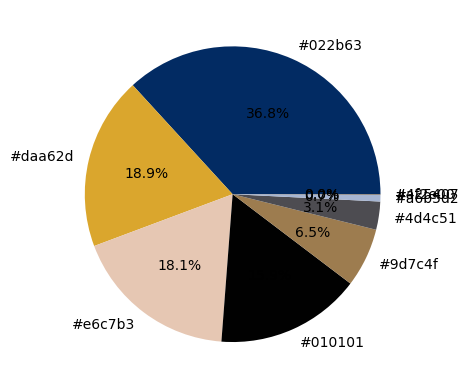

In [68]:
plt.pie(ratio, 
        labels = hex_labels, 
        autopct = '%.1f%%', 
        colors = hex_labels)

(990, 750, 4)


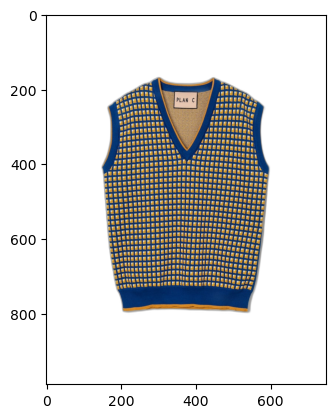

In [76]:
import cv2

img = cv2.imread('/Users/kyebeomjeon/workspace/Studio_Lab/saved_png/removed_bg_318.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
print(img.shape)
plt.imshow(img)
plt.show()

254101
[[ 17.49947987  46.40516034  91.94565262 253.65721424]
 [205.98351639 155.93847851  65.08027646 253.63775005]
 [207.24722373 194.96396676 177.89019181 253.5624369 ]
 [ 18.38620623  17.95998461  17.38322432  24.30367449]
 [121.53673785 109.36892693  95.66417365 245.16375004]]


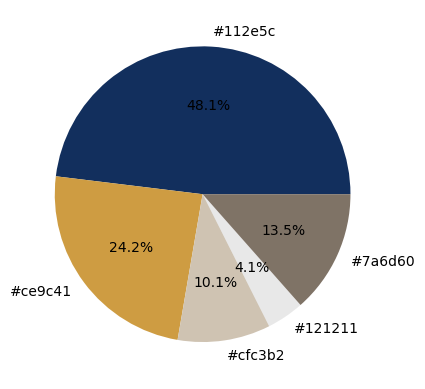

In [77]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.colors as cs

img_data = []
for i in range(990) :
    for j in range(750) :
        if img[i][j][3] != 0 :
            img_data.append(img[i][j])
print(len(img_data))

clustering = KMeans(n_clusters = 5)
clustering.fit(img_data)

labels = np.unique(clustering.labels_)
hist, _ = np.histogram(clustering.labels_, bins = np.arange(len(labels) + 1))

colors = []
hexlabels = []

for i in range(clustering.cluster_centers_.shape[0]) :
    colors.append(tuple(clustering.cluster_centers_[i] / 255))
    hexlabels.append(cs.to_hex(tuple(clustering.cluster_centers_[i] / 255)))

print(clustering.cluster_centers_)
plt.pie(hist, labels = hexlabels, colors = colors, autopct = '%1.1f%%')
plt.show()

In [78]:
estimator = KMeans()
param_grid = {'n_clusters' : [1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator, param_grid = param_grid) 
grid.fit(data)
print(grid.best_params_)

cluster_num = grid.best_params_['n_clusters']

/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1364, in score
    return -_labels_inertia_threadpool_limit(
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 755, in _labels_inertia_threadpool_limit
    with threadpool_limits(limits=1, user_api="blas"):
  Fi

/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1364, in score
    return -_labels_inertia_threadpool_limit(
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 755, in _labels_inertia_threadpool_limit
    with threadpool_limits(limits=1, user_api="blas"):
  Fi

/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1364, in score
    return -_labels_inertia_threadpool_limit(
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 755, in _labels_inertia_threadpool_limit
    with threadpool_limits(limits=1, user_api="blas"):
  Fi

/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1364, in score
    return -_labels_inertia_threadpool_limit(
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 755, in _labels_inertia_threadpool_limit
    with threadpool_limits(limits=1, user_api="blas"):
  Fi

/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1364, in score
    return -_labels_inertia_threadpool_limit(
  File "/Users/kyebeomjeon/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 755, in _labels_inertia_threadpool_limit
    with threadpool_limits(limits=1, user_api="blas"):
  Fi

AttributeError: 'NoneType' object has no attribute 'split'